In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

In [57]:
risk_metrics_daily = ['BB_1YR_DEFAULT_PROB', 
                      'BB_3M_DEFAULT_PROB',
                      'COEF_DETER_R_SQUARED',
                      'STD_DEV_ERR_OVERRIDABLE',
                      'BETA_T_TEST',
                      'CORRELATION_SQUARED_FOR_BETA_PM',
                      'UNLEVERED_BETA']

In [3]:
risk_metrics_quarterly = ['BS_RISK_WEIGHTED_ASSETS',
                          'BS_TOT_CAP_TO_RISK_BASE_CAP',
                          'IS_INC_BEF_XO_ITEM',
                          'PROC_FR_REPAYMNTS_BOR_DETAILED',
                          'TOT_LIAB_AND_EQY',
                          'NET_CHANGE_LIABILITIES',
                          'IS_OPER_INC',
                          'IS_GAIN_LOSS_ON_INVESTMENTS',
                          'TOTAL_DEBT_1_YEAR_GROWTH',
                          'NET_CHNG_LT_DEBT',
                          'CF_INCR_CAP_STOCK',
                          'CF_DECR_CAP_STOCK',
                          'NET_CHG_IN_LT_INVEST_DETAILED' ]

In [4]:
xls = pd.ExcelFile('data_clean_financial_update.xlsx')

In [5]:
#IMPLIED_MOVE = pd.read_excel(xls, 'EARNINGS_RELATED_IMPLIED_MOVE')
ONE_YR_DEFAULT_PROB = pd.read_excel(xls, 'BB_1YR_DEFAULT_PROB')
THREE_MO_DEFAULT_PROB = pd.read_excel(xls,'BB_3M_DEFAULT_PROB')
COEF = pd.read_excel(xls,'COEF_DETER_R_SQUARED' )
STD = pd.read_excel(xls, 'STD_DEV_ERR_OVERRIDABLE')
BETA_T_TEST = pd.read_excel(xls,'BETA_T_TEST' )
CORRELATION_SQUARED = pd.read_excel(xls,'CORRELATION_SQUARED_FOR_BETA_PM')
UNLEVERED_BETA = pd.read_excel(xls,'UNLEVERED_BETA')

In [6]:
metrics = []
#metrics.append(IMPLIED_MOVE)
metrics.append(ONE_YR_DEFAULT_PROB)
metrics.append(THREE_MO_DEFAULT_PROB)
metrics.append(COEF)
metrics.append(STD)
metrics.append(BETA_T_TEST)
metrics.append(CORRELATION_SQUARED)
metrics.append(UNLEVERED_BETA)


In [7]:
for i in range(len(metrics)): 
  metrics[i] = metrics[i].rename(columns={'Unnamed: 0':'Date'})
  metrics[i].Date = pd.to_datetime(metrics[i].Date)
  metrics[i].set_index('Date',inplace=True)
  metrics[i] = metrics[i].resample('QS').mean()
  column_index = []
  for j in range(metrics[i].shape[1]):
    if metrics[i].iloc[:,j].isna().sum() >= 15: 
      column_index.append(j)
  metrics[i] = metrics[i].drop(metrics[i].columns[column_index],axis=1)
  imputer = KNNImputer(n_neighbors=2)
  metrics[i] = pd.DataFrame(imputer.fit_transform(metrics[i]),columns=metrics[i].columns)
  #metrics[i] = metrics[i].drop(metrics[i].index[len(metrics[i])-1])
  metrics[i] = metrics[i].iloc[:46,:]

In [8]:
for i in range(len(metrics)): 
  print(metrics[i].shape)

(46, 183)
(46, 183)
(46, 311)
(46, 311)
(46, 311)
(46, 305)
(46, 136)


In [9]:
company_names_daily = []
for i in range(len(metrics)):
  company_names_daily.append(set(metrics[i].columns))
cn_daily = set.intersection(*company_names_daily)

In [10]:
RISK_WEIGHTED_ASSETS = pd.read_excel(xls,'BS_RISK_WEIGHTED_ASSETS')
CAP = pd.read_excel(xls,'BS_TOT_CAP_TO_RISK_BASE_CAP')
ITEM = pd.read_excel(xls, 'IS_INC_BEF_XO_ITEM')
REPAYMNTS = pd.read_excel(xls,'PROC_FR_REPAYMNTS_BOR_DETAILED')
LIAB = pd.read_excel(xls,'TOT_LIAB_AND_EQY')
NET_CHANGE_LIAB = pd.read_excel(xls,'NET_CHANGE_LIABILITIES')
OPER = pd.read_excel(xls,'IS_OPER_INC')
GAIN_LOSS = pd.read_excel(xls, 'IS_GAIN_LOSS_ON_INVESTMENTS')
TOTAL_DEBT = pd.read_excel(xls, 'TOTAL_DEBT_1_YEAR_GROWTH')
LT_DEBT = pd.read_excel(xls, 'NET_CHNG_LT_DEBT')
INCR = pd.read_excel(xls, 'CF_INCR_CAP_STOCK')
DECR = pd.read_excel(xls, 'CF_DECR_CAP_STOCK')
LT_INVEST = pd.read_excel(xls, 'NET_CHG_IN_LT_INVEST_DETAILED')



In [34]:
date_time = RISK_WEIGHTED_ASSETS.iloc[:46,0]

In [11]:
metrics_quarterly = []
metrics_quarterly.append(RISK_WEIGHTED_ASSETS)
metrics_quarterly.append(CAP)
metrics_quarterly.append(ITEM)
metrics_quarterly.append(REPAYMNTS)
metrics_quarterly.append(LIAB)
metrics_quarterly.append(NET_CHANGE_LIAB)
metrics_quarterly.append(OPER)
metrics_quarterly.append(GAIN_LOSS)
metrics_quarterly.append(TOTAL_DEBT)
metrics_quarterly.append(LT_DEBT)
metrics_quarterly.append(INCR)
metrics_quarterly.append(DECR)
metrics_quarterly.append(LT_INVEST)

In [12]:
for i in range(len(metrics_quarterly)): 
  metrics_quarterly[i] = metrics_quarterly[i].rename(columns={'Unnamed: 0':'Date'})
  metrics_quarterly[i].Date = pd.to_datetime(metrics_quarterly[i].Date)
  metrics_quarterly[i].set_index('Date',inplace=True)
  column_index = []
  for j in range(metrics_quarterly[i].shape[1]):
    if metrics_quarterly[i].iloc[:,j].isna().sum() >= 15: 
      column_index.append(j)
  metrics_quarterly[i] = metrics_quarterly[i].drop(metrics_quarterly[i].columns[column_index],axis=1)
  imputer = KNNImputer(n_neighbors=2)
  metrics_quarterly[i] = pd.DataFrame(imputer.fit_transform(metrics_quarterly[i]),columns=metrics_quarterly[i].columns)
  metrics_quarterly[i] = metrics_quarterly[i].iloc[:46,:]

In [13]:
for i in range(len(metrics_quarterly)): 
  print(metrics_quarterly[i].shape)

(46, 52)
(46, 82)
(46, 171)
(46, 139)
(46, 165)
(46, 156)
(46, 168)
(46, 66)
(46, 132)
(46, 159)
(46, 157)
(46, 158)
(46, 137)


In [14]:
company_names_quarterly = []
for i in range(len(metrics_quarterly)): 
  company_names_quarterly.append(set(metrics_quarterly[i].columns))

cn_quarterly = set.intersection(*company_names_quarterly)

In [15]:
total = set.intersection(cn_quarterly,cn_daily)
len(total)

27

In [58]:
total = list(total)
all_risk_company_name_list = np.repeat(total,len(date_time))
date_time_list = np.tile(date_time,len(total))
new_data = pd.DataFrame({"Company":all_risk_company_name_list, 'Date':date_time_list})

In [60]:
for i in range(len(metrics_quarterly)):
  temp = []
  for j in total:
    temp = temp + metrics_quarterly[i][j].to_list()
  new_data[risk_metrics_quarterly[i]] = temp

for i in range(len(metrics)):
  temp = []
  for j in total:
    temp = temp + metrics[i][j].to_list()
  new_data[risk_metrics_daily[i]] = temp

In [112]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

scaler = preprocessing.StandardScaler() 
scaled_Data = scaler.fit_transform(new_data.iloc[:,2:]) 
norm_Data = preprocessing.normalize(scaled_Data)
pca = PCA()
principalComponents = pca.fit(norm_Data)
print(pca.explained_variance_ratio_)

[4.97502260e-01 1.69331811e-01 9.50950639e-02 8.52307732e-02
 4.23230787e-02 3.80249697e-02 1.75041566e-02 1.28812721e-02
 1.05772753e-02 1.02151115e-02 5.96470830e-03 5.28030313e-03
 4.21500810e-03 2.40409105e-03 1.09776192e-03 1.00305898e-03
 8.61471612e-04 3.36081370e-04 1.08415779e-04 4.33282060e-05]


Text(0, 0.5, 'cumulative explained variance')

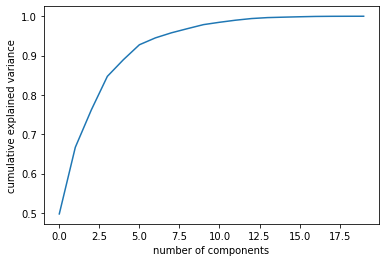

In [113]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [114]:
np.cumsum(pca.explained_variance_ratio_)

array([0.49750226, 0.66683407, 0.76192913, 0.84715991, 0.88948299,
       0.92750796, 0.94501211, 0.95789338, 0.96847066, 0.97868577,
       0.98465048, 0.98993078, 0.99414579, 0.99654988, 0.99764764,
       0.9986507 , 0.99951217, 0.99984826, 0.99995667, 1.        ])

In [131]:
n_components=5
pca_final = PCA(n_components=n_components)
pca_final.fit(norm_Data)
pca_Data = pca_final.fit_transform(norm_Data)
labels = {str(i): f"PC {i+1}" 
              for i in range(n_components)}

fig = px.scatter_matrix(
    pca_Data,
    labels=labels,
    dimensions=range(n_components)
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [126]:
pca_final.get_covariance()[1]

array([ 0.01302198,  0.07834604,  0.01378037, -0.00145044,  0.0155304 ,
        0.0096531 ,  0.01354719,  0.01061931, -0.00643587, -0.00175881,
        0.01046454, -0.0103328 , -0.00828081,  0.01078909,  0.00423324,
        0.00791479,  0.05738738,  0.00460707,  0.00855128,  0.00436748])

In [132]:
for i in np.arange(n_components):
    index =  np.argmax(np.absolute(pca_final.get_covariance()[i]))
    max_cov = pca_final.get_covariance()[i][index]
    column = new_data.iloc[:,2:].columns[index]
    print("Principal Component", i+1, "maximum covariance :", "{:.2f}".format(max_cov), "from column", column)

Principal Component 1 maximum covariance : 0.02 from column BS_RISK_WEIGHTED_ASSETS
Principal Component 2 maximum covariance : 0.12 from column BS_TOT_CAP_TO_RISK_BASE_CAP
Principal Component 3 maximum covariance : 0.02 from column IS_INC_BEF_XO_ITEM
Principal Component 4 maximum covariance : 0.01 from column PROC_FR_REPAYMNTS_BOR_DETAILED
Principal Component 5 maximum covariance : 0.02 from column TOT_LIAB_AND_EQY
